In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import numpy as np
import seaborn as sns
from scipy import stats
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from scipy.stats import ttest_1samp
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import Dataset**

In [2]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.rename(columns = {'Score': 'score',
            'Overall rank': 'rank',
            'Country or region': 'country_region',       
            'GDP per capita': 'gdp',
            'Social support': 'social',
            'Freedom to make life choices': 'freedom',
            'Healthy life expectancy': 'healthy',
            'Generosity': 'generosity',
            'Perceptions of corruption': 'corruption'},
          inplace = True)

In [4]:
print(df.columns)

Index(['rank', 'country_region', 'score', 'gdp', 'social', 'healthy',
       'freedom', 'generosity', 'corruption'],
      dtype='object')


In [5]:
df.head()

,rank,country_region,score,gdp,social,healthy,freedom,generosity,corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**Descriptive Statistics of DV and IVs**

In [6]:
df.describe()

,rank,score,gdp,social,healthy,freedom,generosity,corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


**Categorize GDP by cutting method**

In [7]:
df['gdp'].describe()

count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: gdp, dtype: float64

In [8]:
gdp = pd.cut(df.gdp,bins=[0,0.91,1.684],labels=['low','high'])
df.insert(4,'gdp_cat',gdp)

In [9]:
df.head(10)

,rank,country_region,score,gdp,gdp_cat,social,healthy,freedom,generosity,corruption
0,1,Finland,7.769,1.340,high,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,high,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,high,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,high,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,high,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,high,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,high,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,high,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,high,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,high,1.475,1.016,0.532,0.244,0.226


**Correlation Matrix**

In [10]:
df1 = df.drop(columns=['rank', 'country_region'])

In [11]:
corrMatrix = df1.corr()
print(corrMatrix)

               score       gdp    social  ...   freedom  generosity  corruption
score       1.000000  0.793883  0.777058  ...  0.566742    0.075824    0.385613
gdp         0.793883  1.000000  0.754906  ...  0.379079   -0.079662    0.298920
social      0.777058  0.754906  1.000000  ...  0.447333   -0.048126    0.181899
healthy     0.779883  0.835462  0.719009  ...  0.390395   -0.029511    0.295283
freedom     0.566742  0.379079  0.447333  ...  1.000000    0.269742    0.438843
generosity  0.075824 -0.079662 -0.048126  ...  0.269742    1.000000    0.326538
corruption  0.385613  0.298920  0.181899  ...  0.438843    0.326538    1.000000

[7 rows x 7 columns]


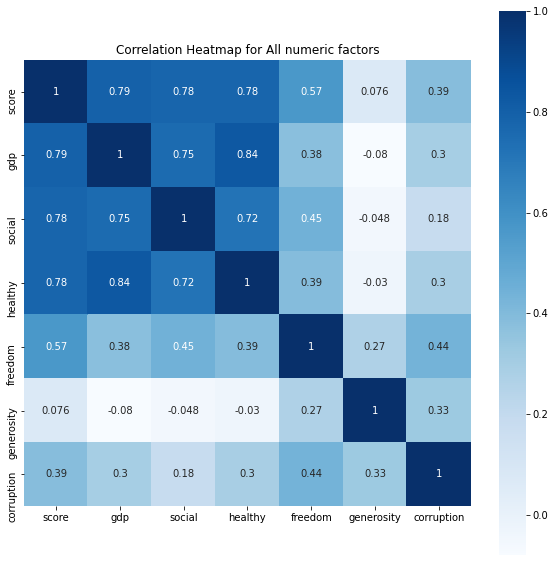

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, vmax=1, square=True, cmap="Blues")
plt.title('Correlation Heatmap for All numeric factors')
plt.show()


**Scatter Matrices**

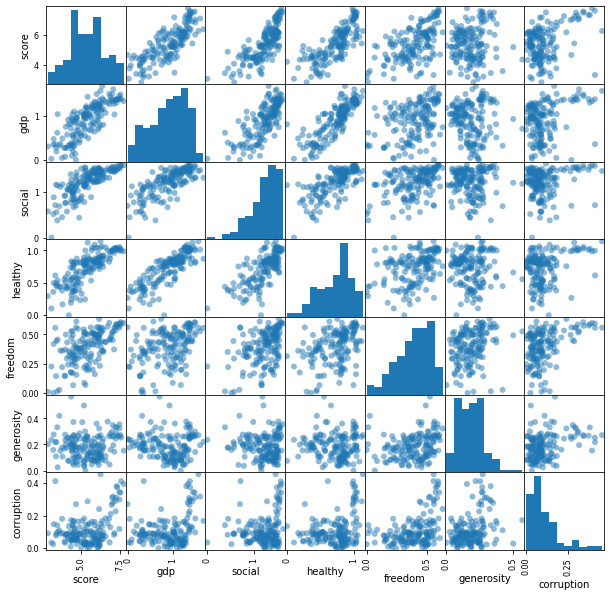

In [13]:
grr = pd.plotting.scatter_matrix(df1,figsize=(10,10),marker="o")

**Boxplot**

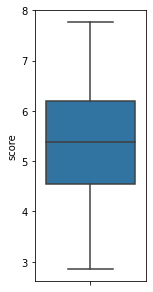

In [14]:
plt.figure(figsize=(2,5))
#plt.xlabel('score')
sns.boxplot(y=df['score'])
plt.show()

**Distribution of DV**

Text(0.5, 1.0, 'Distribution of Score')

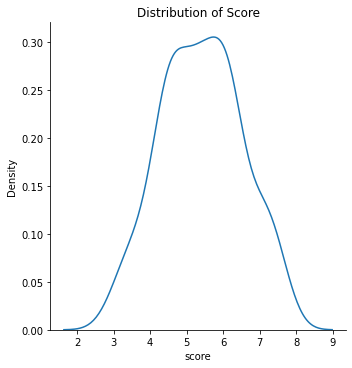

In [15]:
sns.displot(df, x='score', kind='kde')
plt.title('Distribution of Score')

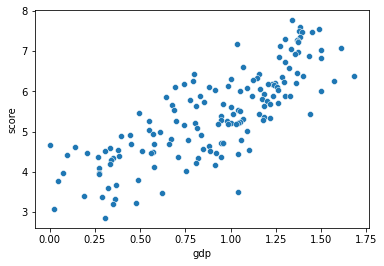

In [16]:
sns.scatterplot(x='gdp', y='score', data = df)

**Violion Plots**

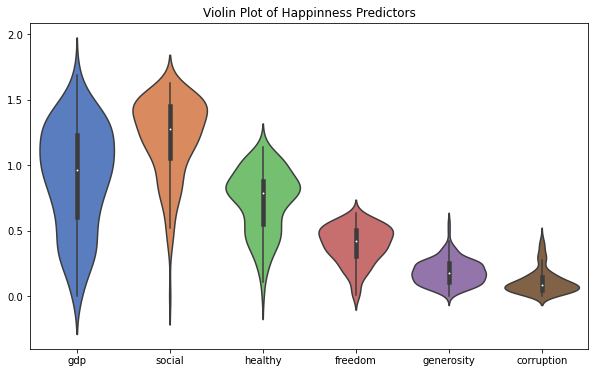

In [17]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df.drop(columns=['rank','score']), palette="muted", scale="width")
plt.title('Violin Plot of Happinness Predictors')
plt.show()

In [18]:
df['social_trans'] = (df['social'])**(3)*0.3
df['healthy_trans'] = (df['healthy'])**(2)
df['freedom_trans'] = (df['freedom'])**(2)*2.5
df['generosity_trans'] = (df['generosity']+0.2)**(1/2)*2-0.7
df['corruption_trans'] = (df['corruption'])**(1/3)*2-0.5

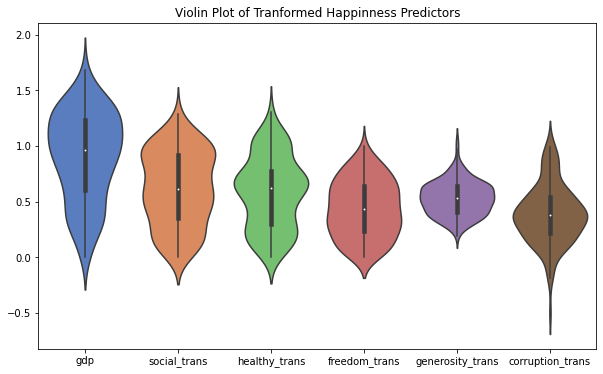

In [19]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df.drop(columns=['rank','score','social','healthy','freedom','generosity','corruption']), palette="muted", scale="width")
plt.title('Violin Plot of Tranformed Happinness Predictors')
plt.show()

# **RQ1: Dummy/Contrast Coding**


*   Is there a difference in happiness scores between countries with high GDP and countries with low GDP?



In [20]:
df.groupby('gdp_cat')['score'].mean()

gdp_cat
low     4.622045
high    6.009057
Name: score, dtype: float64

In [21]:
from patsy.contrasts import Treatment
levels = [1,2,3,4]
contrast = Treatment(reference = 0).code_without_intercept(levels)
print(contrast.matrix)

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [22]:
df.gdp_cat.head(10)

0    high
1    high
2    high
3    high
4    high
5    high
6    high
7    high
8    high
9    high
Name: gdp_cat, dtype: category
Categories (2, object): ['low' < 'high']

In [23]:
pd.get_dummies(df.gdp_cat.values, drop_first=False)

,low,high
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
151,1,0
152,1,0
153,1,0
154,1,0


In [24]:
from statsmodels.formula.api import ols
mod = ols('score ~ C(gdp_cat, Treatment)', data = df)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     94.00
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.33e-17
Time:                        03:21:36   Log-Likelihood:                -197.85
No. Observations:                 154   AIC:                             399.7
Df Residuals:                     152   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [25]:
from patsy.contrasts import ContrastMatrix

def _name_levels(prefix, levels):
    return ["[%s%s]" % (prefix, level) for level in levels]

class Simple(object):
    def _simple_contrast(self, levels):
        nlevels = len(levels)
        contr = -1./nlevels * np.ones((nlevels, nlevels-1))
        contr[1:][np.diag_indices(nlevels-1)] = (nlevels-1.)/nlevels
        return contr

    def code_with_intercept(self, levels):
        contrast = np.column_stack((np.ones(len(levels)),
                                    self._simple_contrast(levels)))
        return ContrastMatrix(contrast, _name_levels("Simp.", levels))

    def code_without_intercept(self, levels):
        contrast = self._simple_contrast(levels)
        return ContrastMatrix(contrast, _name_levels("Simp.", levels[:-1]))

In [26]:
df.groupby('gdp_cat')['score'].mean().mean()

5.315551123691886

In [27]:
contrast = Simple().code_without_intercept(levels)
print(contrast.matrix)

[[-0.25 -0.25 -0.25]
 [ 0.75 -0.25 -0.25]
 [-0.25  0.75 -0.25]
 [-0.25 -0.25  0.75]]


In [28]:
mod = ols('score ~ C(gdp_cat, Treatment)', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     94.00
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.33e-17
Time:                        03:21:36   Log-Likelihood:                -197.85
No. Observations:                 154   AIC:                             399.7
Df Residuals:                     152   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [29]:
my_model = smf.ols(formula='score ~  gdp_cat', data = df)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     94.00
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.33e-17
Time:                        03:21:36   Log-Likelihood:                -197.85
No. Observations:                 154   AIC:                             399.7
Df Residuals:                     152   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6220      0.108     

**Reclaim result by Paired-sample t test with equal variance**

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)
 

In [30]:
H = df[df['gdp'] > 0.91]
L = df[df['gdp'] <= 0.91]
H_GDP = H.dropna()['score']
L_GDP = L.dropna()['score']

In [31]:
sp.ttest_rel(H_GDP[:50], L_GDP[:50])

Ttest_relResult(statistic=91.53784928683862, pvalue=1.9282851745468034e-56)

# **RQ2: Check Probability of Tranformed IVs, Linear Regression to interpret main effects**


*   Which happiness predictors are significant to indicate happiness scores in countries with high/low GDP respectively and how they impact differently between countries with different levels of GDP?



In [32]:
H = df[df['gdp'] > 0.91]
L = df[df['gdp'] <= 0.91]
H_GDP = H.dropna()['score']
L_GDP = L.dropna()['score']

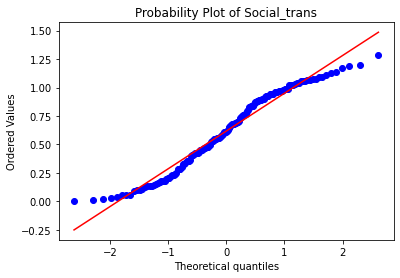

In [33]:
import scipy.stats as stats
stats.probplot(df['social_trans'], dist="norm", plot=plt)
plt.title('Probability Plot of Social_trans')
plt.show()

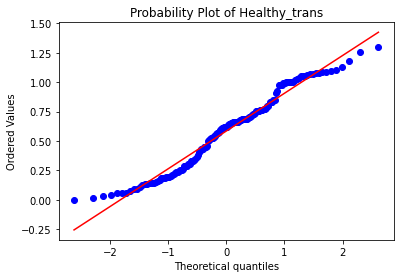

In [34]:
stats.probplot(df['healthy_trans'], dist="norm", plot=plt)
plt.title('Probability Plot of Healthy_trans')
plt.show()

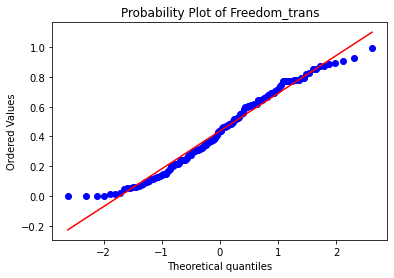

In [35]:
stats.probplot(df['freedom_trans'], dist="norm", plot=plt)
plt.title('Probability Plot of Freedom_trans')
plt.show()

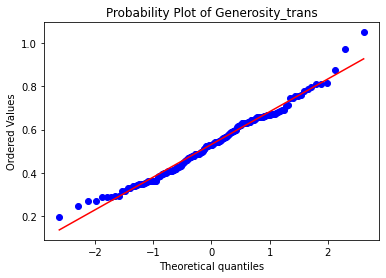

In [36]:
stats.probplot(df['generosity_trans'], dist="norm", plot=plt)
plt.title('Probability Plot of Generosity_trans')
plt.show()

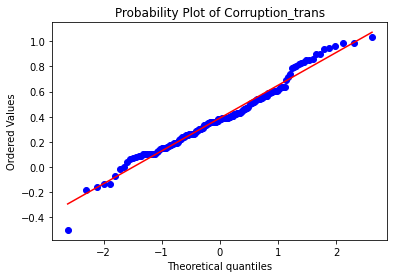

In [37]:
stats.probplot(df['corruption_trans'], dist="norm", plot=plt)
plt.title('Probability Plot of Corruption_trans')
plt.show()

In [38]:
my_model = smf.ols(formula='score ~  social_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     97.89
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           7.47e-16
Time:                        03:21:37   Log-Likelihood:                -82.191
No. Observations:                  88   AIC:                             168.4
Df Residuals:                      86   BIC:                             173.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8557      0.228     16.915   

In [39]:
my_model = smf.ols(formula='score ~  social_trans', data = L)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     44.78
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           5.71e-09
Time:                        03:21:37   Log-Likelihood:                -65.992
No. Observations:                  68   AIC:                             136.0
Df Residuals:                      66   BIC:                             140.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8672      0.138     28.110   

In [40]:
my_model = smf.ols(formula='score ~  healthy_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     68.69
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.38e-12
Time:                        03:21:37   Log-Likelihood:                -89.801
No. Observations:                  88   AIC:                             183.6
Df Residuals:                      86   BIC:                             188.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.9498      0.259     15.233

In [41]:
my_model = smf.ols(formula='score ~  healthy_trans', data = L)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     42.28
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.23e-08
Time:                        03:21:37   Log-Likelihood:                -66.767
No. Observations:                  68   AIC:                             137.5
Df Residuals:                      66   BIC:                             142.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8243      0.146     26.143

In [42]:
my_model = smf.ols(formula='score ~  freedom_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     60.53
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.47e-11
Time:                        03:21:38   Log-Likelihood:                -92.184
No. Observations:                  88   AIC:                             188.4
Df Residuals:                      86   BIC:                             193.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.9138      0.160     30.772

In [43]:
my_model = smf.ols(formula='score ~  freedom_trans', data = L)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     24.00
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           6.55e-06
Time:                        03:21:38   Log-Likelihood:                -73.055
No. Observations:                  68   AIC:                             150.1
Df Residuals:                      66   BIC:                             154.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.9558      0.162     24.468

In [44]:
my_model = smf.ols(formula='score ~ generosity_trans ', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     20.86
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.63e-05
Time:                        03:21:38   Log-Likelihood:                -106.07
No. Observations:                  88   AIC:                             216.1
Df Residuals:                      86   BIC:                             221.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7268      0.295  

In [45]:
my_model = smf.ols(formula='score ~  generosity_trans', data = L)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7695
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.384
Time:                        03:21:38   Log-Likelihood:                -83.206
No. Observations:                  68   AIC:                             170.4
Df Residuals:                      66   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.9903      0.431  

In [46]:
my_model = smf.ols(formula='score ~  corruption_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     40.07
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.07e-08
Time:                        03:21:38   Log-Likelihood:                -98.801
No. Observations:                  88   AIC:                             201.6
Df Residuals:                      86   BIC:                             206.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.3022      0.138  

In [47]:
my_model = smf.ols(formula='score ~  corruption_trans', data = L)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.743
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.191
Time:                        03:21:38   Log-Likelihood:                -82.713
No. Observations:                  68   AIC:                             169.4
Df Residuals:                      66   BIC:                             173.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.8511      0.200  

**Two-way ANOVA**

# **RQ3.1 Multiple Linear Regression to interpret interation effects and construct predicion model** 

*   How do the significant factors interact to impact the happiness score in countries with low GDP respectively and how do the happiness scores in countries with low GDP be predicted by the significant predictors and interact predictors?



In [48]:
H_1 = H.drop(columns=['rank', 'country_region','score','gdp'])
L_1 = L.drop(columns=['rank', 'country_region','score','gdp'])

In [49]:
L_2 = L_1.drop(columns=['gdp_cat','social','healthy','freedom','generosity','corruption','generosity_trans','corruption_trans'])
L_2.head()


,social_trans,healthy_trans,freedom_trans
26,0.613064,0.556516,0.715562
34,0.574759,0.622521,0.462250
40,1.072368,0.571536,0.995402
44,0.697861,0.697225,0.473062
45,0.560988,0.574564,0.597803


In [50]:
corrMatrix_L = L_2.corr()
corrMatrix_L

,social_trans,healthy_trans,freedom_trans
social_trans,1.000000,0.612945,0.427026
healthy_trans,0.612945,1.000000,0.447613
freedom_trans,0.427026,0.447613,1.000000


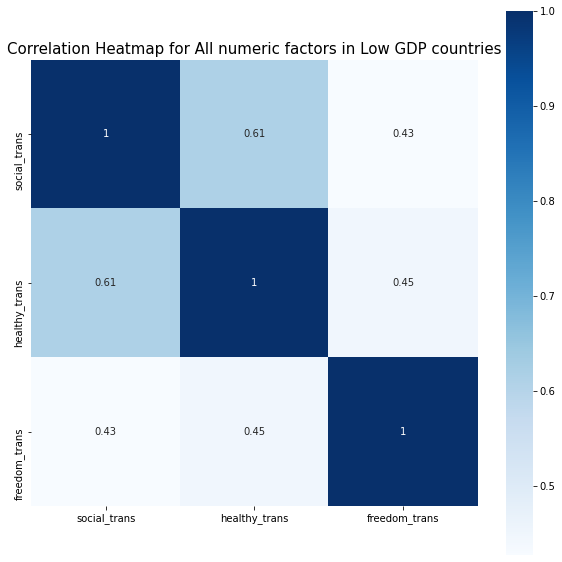

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix_L, annot=True, vmax=1, square=True, cmap="Blues")
plt.title('Correlation Heatmap for All numeric factors in Low GDP countries',fontsize = 15)
plt.show()

In [52]:
my_model = smf.ols(formula='score ~  social_trans * healthy_trans', data = L)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     20.88
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.51e-09
Time:                        03:21:38   Log-Likelihood:                -60.394
No. Observations:                  68   AIC:                             128.8
Df Residuals:                      64   BIC:                             137.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [53]:
my_model = smf.ols(formula='score ~  social_trans * freedom_trans', data = L)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.57
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           4.08e-09
Time:                        03:21:38   Log-Likelihood:                -61.468
No. Observations:                  68   AIC:                             130.9
Df Residuals:                      64   BIC:                             139.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [54]:
my_model = smf.ols(formula='score ~  healthy_trans * freedom_trans', data = L)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     18.26
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.14e-08
Time:                        03:21:38   Log-Likelihood:                -62.575
No. Observations:                  68   AIC:                             133.2
Df Residuals:                      64   BIC:                             142.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [55]:
my_model = smf.ols(formula='score ~ social_trans + healthy_trans + freedom_trans', data = L)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     24.34
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.26e-10
Time:                        03:21:39   Log-Likelihood:                -57.716
No. Observations:                  68   AIC:                             123.4
Df Residuals:                      64   BIC:                             132.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5179      0.150     23.445

# **RQ3.2 Multiple Linear Regression to interpret interation effects and construct predicion model** 

*   How do the significant factors interact to impact the happiness score in countries with high GDP respectively and how do the happiness scores in countries with high GDP be predicted by the significant predictors and interact predictors?




In [56]:
print(H_1)
H_2 = H_1.drop(columns=['gdp_cat','social','healthy','freedom','generosity','corruption'])
corrMatrix_H = H_2.corr()
corrMatrix_H

    gdp_cat  social  healthy  ...  freedom_trans  generosity_trans  corruption_trans
0      high   1.587    0.986  ...       0.888040          0.488276          0.964966
1      high   1.573    0.996  ...       0.876160          0.644619          0.985792
2      high   1.582    1.028  ...       0.909022          0.672589          0.897274
3      high   1.624    1.026  ...       0.873202          0.788624          0.480974
4      high   1.522    0.999  ...       0.775623          0.744991          0.835884
..      ...     ...      ...  ...            ...               ...               ...
123    high   1.000    0.815  ...       0.069722          0.317841          0.260590
125    high   0.980    0.574  ...       0.145203          0.479830          0.392949
129    high   1.265    0.831  ...       0.552250          0.632666          0.221765
136    high   1.039    0.644  ...       0.145203          0.350714          0.312310
147    high   1.145    0.538  ...       0.517563          0.24868

,social_trans,healthy_trans,freedom_trans,generosity_trans,corruption_trans
social_trans,1.000000,0.410707,0.464056,0.282796,0.365116
healthy_trans,0.410707,1.000000,0.390956,0.328594,0.497805
freedom_trans,0.464056,0.390956,1.000000,0.496485,0.549331
generosity_trans,0.282796,0.328594,0.496485,1.000000,0.386501
corruption_trans,0.365116,0.497805,0.549331,0.386501,1.000000


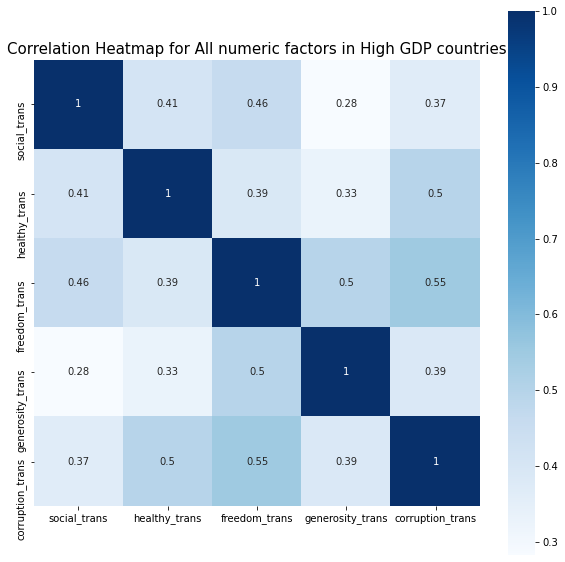

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix_H, annot=True, vmax=1, square=True, cmap="Blues")
plt.title('Correlation Heatmap for All numeric factors in High GDP countries',fontsize = 15)
plt.show()

In [58]:
my_model = smf.ols(formula='score ~  social_trans*healthy_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     67.27
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           2.88e-22
Time:                        03:21:39   Log-Likelihood:                -61.753
No. Observations:                  88   AIC:                             131.5
Df Residuals:                      84   BIC:                             141.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [59]:
my_model = smf.ols(formula='score ~  social_trans * freedom_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           2.70e-20
Time:                        03:21:39   Log-Likelihood:                -66.534
No. Observations:                  88   AIC:                             141.1
Df Residuals:                      84   BIC:                             151.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [60]:
my_model = smf.ols(formula='score ~  social_trans * generosity_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     42.17
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.01e-16
Time:                        03:21:39   Log-Likelihood:                -75.207
No. Observations:                  88   AIC:                             158.4
Df Residuals:                      84   BIC:                             168.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [61]:
my_model = smf.ols(formula='score ~  social_trans * corruption_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     57.11
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           3.20e-20
Time:                        03:21:39   Log-Likelihood:                -66.714
No. Observations:                  88   AIC:                             141.4
Df Residuals:                      84   BIC:                             151.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [62]:
my_model = smf.ols(formula='score ~  healthy_trans * freedom_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     45.50
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.46e-17
Time:                        03:21:39   Log-Likelihood:                -73.171
No. Observations:                  88   AIC:                             154.3
Df Residuals:                      84   BIC:                             164.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [63]:
my_model = smf.ols(formula='score ~  healthy_trans * generosity_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     28.51
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           8.25e-13
Time:                        03:21:39   Log-Likelihood:                -84.736
No. Observations:                  88   AIC:                             177.5
Df Residuals:                      84   BIC:                             187.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [64]:
my_model = smf.ols(formula='score ~  healthy_trans * corruption_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     29.81
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           3.19e-13
Time:                        03:21:39   Log-Likelihood:                -83.731
No. Observations:                  88   AIC:                             175.5
Df Residuals:                      84   BIC:                             185.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [65]:
my_model = smf.ols(formula='score ~  freedom_trans * generosity_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     22.13
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.18e-10
Time:                        03:21:40   Log-Likelihood:                -90.005
No. Observations:                  88   AIC:                             188.0
Df Residuals:                      84   BIC:                             197.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [66]:
my_model = smf.ols(formula='score ~  freedom_trans * corruption_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     30.35
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           2.17e-13
Time:                        03:21:40   Log-Likelihood:                -83.322
No. Observations:                  88   AIC:                             174.6
Df Residuals:                      84   BIC:                             184.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [67]:
my_model = smf.ols(formula='score ~  generosity_trans * corruption_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     21.38
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           2.20e-10
Time:                        03:21:40   Log-Likelihood:                -90.666
No. Observations:                  88   AIC:                             189.3
Df Residuals:                      84   BIC:                             199.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [68]:
my_model = smf.ols(formula='score ~  social_trans + freedom_trans + healthy_trans + generosity_trans + corruption_trans + social_trans * freedom_trans + social_trans * corruption_trans + freedom_trans * corruption_trans + generosity_trans * corruption_trans', data = H)
my_model_fit = my_model.fit()
print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     29.67
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.06e-21
Time:                        03:21:40   Log-Likelihood:                -50.204
No. Observations:                  88   AIC:                             120.4
Df Residuals:                      78   BIC:                             145.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc